# 인천공항 이용자수 분석 및 예측

- 출입국 항구/내외국인/성별 국제이동(연간)
- 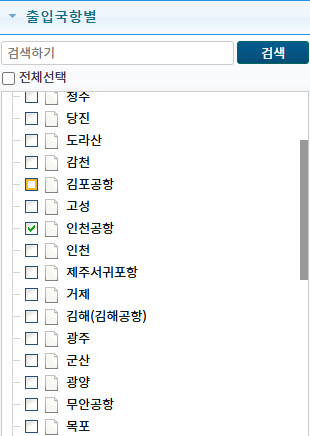
- 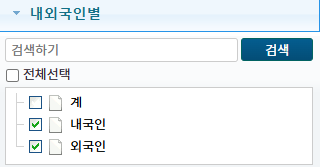
- 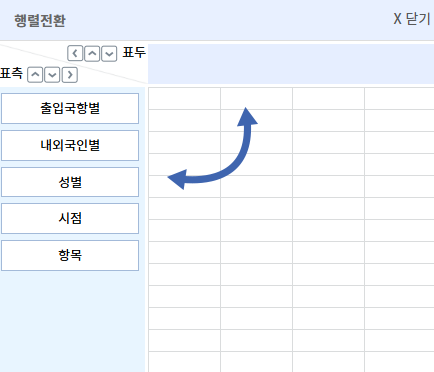 

In [1]:
import pandas as pd 
import matplotlib 
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm 

In [2]:
 #csv 파일 임포트 
file_path="./ref/출입국항구내외국인성별국제이동연간_202503051.csv"
ori = pd.read_csv(file_path,encoding="EUC-KR") 
#우분투 기반일때 encoding ="EUC-KR"만 작성 가능 
ori.head()

,출입국항별,내외국인별,성별,시점,항목,데이터
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093


In [3]:
ex1_data = ori.copy()
ex1_data.columns = ["airport","type1","gender","year","type2","value"]
# ex1_data.rename(columns={"",""}) # 칼럼열이름 새로 하는 함수  
ex1_data


,airport,type1,gender,year,type2,value
0,인천공항,내국인,남자,2001,입국자,70444
1,인천공항,내국인,남자,2001,출국자,96551
2,인천공항,내국인,남자,2002,입국자,101032
3,인천공항,내국인,남자,2002,출국자,124319
4,인천공항,내국인,남자,2003,입국자,102093
...,...,...,...,...,...,...
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388


In [4]:
#필터제작 
filter1 = ex1_data['type1'] == '외국인'
# ex1_data[filter1].head()
ex2_data = ex1_data[filter1].copy()
ex2_data.tail()

,airport,type1,gender,year,type2,value
179,인천공항,외국인,여자,2021,출국자,112458
180,인천공항,외국인,여자,2022,입국자,172332
181,인천공항,외국인,여자,2022,출국자,106797
182,인천공항,외국인,여자,2023,입국자,181388
183,인천공항,외국인,여자,2023,출국자,130769


In [5]:
# filter2 = ex2_data['type2'] =='입국자'
# ex2_data = ex2_data[filter2]
# ex2_data = ex2_data.groupby('year')['value'].sum().reset_index(name="total")
# #names 와 name의 차이 ? 
# ex2_data

In [6]:
filter2 = ex2_data['type2'] == '입국자'
ex2_filtered = ex2_data[filter2]
filter3 = ex2_data['type2'] =='출국자'
ex3_filtered = ex2_data[filter3]

ex2_data= ex2_filtered.groupby('year')['value'].sum().reset_index(name="total")
ex3_data = ex3_filtered.groupby

<Axes: title={'center': '2021~2023년 인천공항 입국 외국인 차트'}>

C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45380 (\N{HANGUL SYLLABLE NYEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 52380 (\N{HANGUL SYLLABLE CEON}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44277 (\N{HANGUL SYLLABLE GONG}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
C:\Users\Admin\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing f

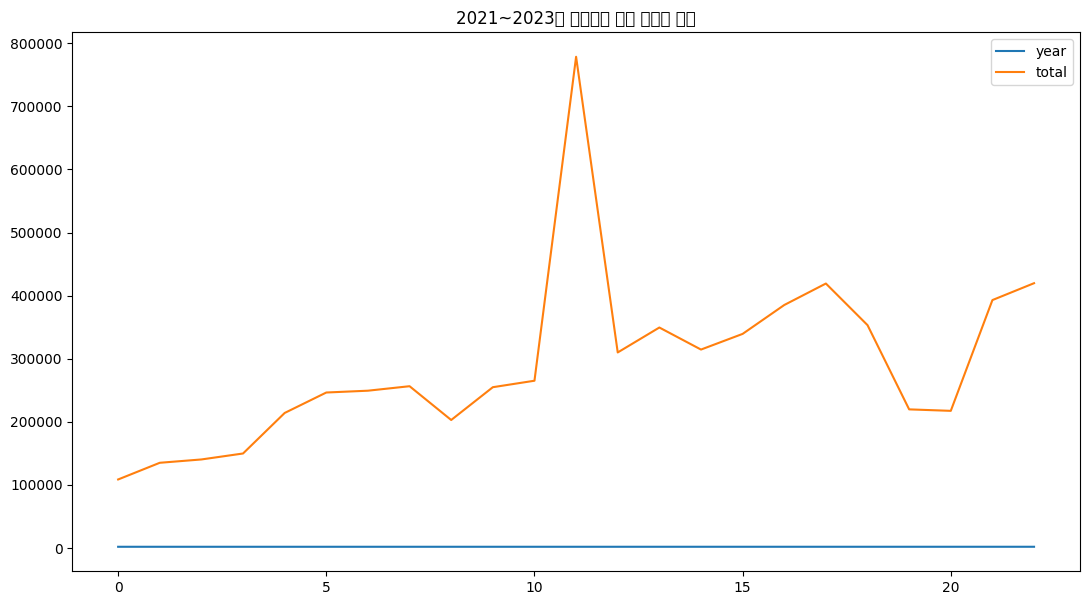

In [7]:
ex2_data.plot(figsize=(13,7),title="2021~2023년 인천공항 입국 외국인 차트")

In [8]:
ex1_data = ex1_data.groupby('year')['value'].sum().reset_index(name='total')
ex1_data

,year,total
0,2001,521210
1,2002,697631
2,2003,747272
3,2004,769912
4,2005,991717
5,2006,996275
6,2007,1012415
7,2008,1080247
8,2009,1009778
9,2010,1019086
